#### Code for the SVM Linear Model 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

#### Importing Data 

In [6]:
validation_data = pd.read_csv("Test_Zero _Var.csv")
train_data = pd.read_csv("Train_Zero _Var.csv")

In [12]:
train_data.groupby('labels').size()

labels
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

#### Data samples creation

In [15]:
response_data = train_data['labels']
predictor_data = train_data.drop(['labels'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split  # Random sampling with seed(randomstate)
r_predictor_train, r_predictor_test, r_response_train, r_response_test = train_test_split(predictor_data, response_data, random_state=1084203)

In [17]:
sample_sets = {'train_predictor':r_predictor_train, 'train_response':r_response_train, 'test_predictor':r_predictor_test, 'test_response':r_response_test}

#### Model Creation  And Prediction for SVM 

In [18]:
from sklearn import svm, metrics

In [19]:
classifier = svm.LinearSVC()

In [20]:
classifier.fit(r_predictor_train, r_response_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [23]:
predicted = classifier.predict(r_predictor_test)

In [24]:
predicted

array([7, 1, 6, ..., 4, 2, 5], dtype=int64)

#### Evaluation of the model 

In [25]:
print("Confusion Matrix\n",metrics.confusion_matrix(r_response_test, predicted))

Confusion Matrix
 [[ 996    0    7    2    1    1    7    9    1    1]
 [   2 1139    3    5    1    1    1    3   13    2]
 [  56   27  821    9   16    2   13   29   49   23]
 [  44   11   26  920    2   16   15   11   20   26]
 [  17   16    2   23  875    1    8   15   23   97]
 [ 162   23    7  137   18  399   50   18   74   69]
 [  41    6    4    2   10   12  951    4   27    0]
 [   6   11   14   17   10    0    3  922    2   79]
 [  33   62    4   56    9   17    7    4  721   84]
 [   5   17    2   29   22    1    1   52    3  885]]


In [26]:
print (metrics.classification_report(r_response_test, predicted))

             precision    recall  f1-score   support

          0       0.73      0.97      0.83      1025
          1       0.87      0.97      0.92      1170
          2       0.92      0.79      0.85      1045
          3       0.77      0.84      0.80      1091
          4       0.91      0.81      0.86      1077
          5       0.89      0.42      0.57       957
          6       0.90      0.90      0.90      1057
          7       0.86      0.87      0.87      1064
          8       0.77      0.72      0.75       997
          9       0.70      0.87      0.78      1017

avg / total       0.83      0.82      0.82     10500



In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(r_response_test, predicted)

0.8218095238095238

In [29]:
from sklearn.metrics import cohen_kappa_score

In [30]:
cohen_kappa_score(r_response_test, predicted) #Scores above .8 are generally considered good agreement

0.8018439871731315

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, auc_thresholds = roc_curve(r_response_test, predicted,pos_label=9)

In [32]:
def plot_roc_curve(fpr, tpr, label=9):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

Area Under The Curve 0.9267879974836719


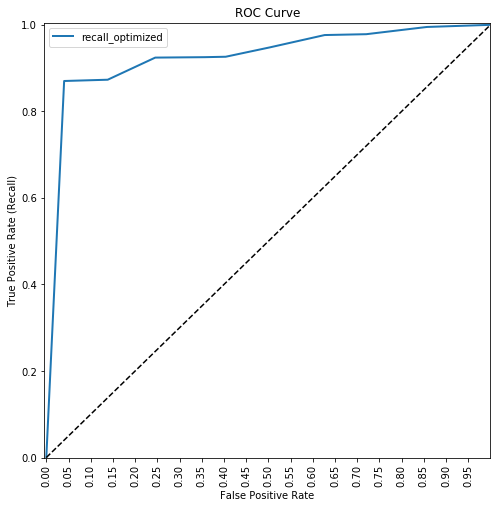

In [33]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
print("Area Under The Curve",auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

#### Predciton using Valdation Data and used for Kaggle Accuracy

In [21]:
output = pd.DataFrame(predicted, columns =['Label'])

In [22]:
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1

In [23]:
output.to_csv('output_SVM.csv', index=False)

In [24]:
output

,ImageId,Label
0,1,7
1,2,1
2,3,6
3,4,6
4,5,2
5,6,1
6,7,0
7,8,2
8,9,1
9,10,0


In [31]:
predicted_on_vali = classifier.predict(validation_data)

In [32]:
print(predicted_on_vali)

[2 0 8 ... 3 9 2]


In [33]:
output = pd.DataFrame(predicted_on_vali, columns =['Label'])

In [34]:
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output_svm.csv', index=False)